In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import rcParams
from DecisionTree import ClassificationTree
from DecisionTree import RegressionTree
import random
# Parametros de las graficas.
rcParams['figure.figsize'] = (4, 4)
rcParams['figure.dpi'] = 150
rcParams['font.size'] = 10

# Aplicaciones:

### 1. [Clasificación Random Forest: Iris](#iris)
### 2. [Gradient Boosting: Taxi](#taxi)
### 3. [Clustering: Pokémon](#pokemon)

![title](https://static.fjcdn.com/gifs/The+dragonball+z+continuum+last+time+on+dragonball+z_db9465_4240023.gif)

## Vimos un modelo que hacia predicciones mediante una serie de condiciones o ifelse: El arbol de decisión.

![title](https://i0.wp.com/dataaspirant.com/wp-content/uploads/2017/01/B03905_05_01-compressor.png?resize=690%2C381)

### Vimos como estos arboles nos podian ayudar a modelar decisiones de clasificación.

## También vimos como podian ayudarnos a modelar variables continuas.

![title](https://boraberan.files.wordpress.com/2014/02/regressiontreeinr.png?w=660&h=269)

### En sí, modelos simples e interpretables.

### Tambien vimos como validar con seguridad un modelo, utilizando el metodo de validación en cruz. Este nos decia que tan bien el modelo generaliza con los datos, y por qué rango va su error de validación. 

![title](http://vinhkhuc.github.io/assets/2015-03-01-cross-validation/5-fold-cv.png)

#### También vimos como podemos crear varios modelos con diferentes parametros y de esta forma obtener los parametros que obtuvieran el error mínimo. Algunas veces incluso surgían nuevos arboles con divisiones diferentes, debido a la diferencia en la cantidad de datos y parametros. Si pudimos obtener una mejor validación al validar el modelo con datos diferentes, podemos aplicar este mismo concepto para obtener un mejor modelo de los arboles?

## Ensamblaje (Ensembling)

### El ensamblaje en Machine Learning es el concepto de entrenar *multiples modelos* con el mismo algoritmo de aprendizaje. Los ensamblajes fusionan varios modelos entrenados para incrementar la estabilidad y generalización que un modelo único no pudiera obtener. En general se dividen en dos, Bagging y Boosting.

![title](https://quantdare.com/wp-content/uploads/2016/04/bb1-800x221.png)


#### Como se diferencian?

### Los metodos de bagging y boosting ambos utilizan *muestras aleatorias* para entrenar sus N modelos. Para cada modelo entrenado, se toma una parte de los datos  (con repetición)  como datos de entrenamiento, lo que genera diferentes parametros para cada modelo. La diferencia es que los metodos de *boosting* , las condiciones son *pesadas*, por lo que se verán patrones establecidos.

![title](https://quantdare.com/wp-content/uploads/2016/04/bb2-800x307.png)

#### ¿Cómo llegan a crearse estos pesos?

### Mientras que en bagging los modelos son independientes y por lo tanto *paralelos*, en boosting los modelos son secuenciales. Es decir, cada modelo depende de los resultados del anterior. *El modelo intenta corregir la parte donde se equivocó el modelo anterior*. 

![title](https://quantdare.com/wp-content/uploads/2016/04/bb3-800x307.png)

#### ¿ Y cómo funciona la predicción?

### Para la predicción final, los metodos de bagging utilizan un simple promedio, mientras que los de boosting una suma ponderada. Los modelos con mejores resultados tendran pesos mayores.

![title](https://quantdare.com/wp-content/uploads/2016/04/bb4-800x307.png)


## Random Forest 

![title](http://file.scirp.org/Html/6-9101686/f799e10c-50bd-48ec-9344-49d767083be5.jpg)

### Es un modelo de ensamblaje tipo bagging basado en los arboles de decisión.


### Entrenamos N arboles, y a cada arbol le damos una muestra de m ejemplos y n variables para su creación. Debido a la variación de los datos, se crearán arboles con decisiones diferentes, los cuales modelan el problema de manera más general.

![title](https://d2wh20haedxe3f.cloudfront.net/sites/default/files/random_forest_diagram_complete.png)

### Al final, para predecir, evaluamos la predicción de cada arbol y elegimos la predicción más común. 

## Aplicación 1: Clasificar especies de Iris

### Otro dataset clásico, en esta ocasión crearemos un modelo de random forest para poder clasificar especies de la flor iris, según características como longitud y ancho de petalos, sepalos, etc. Ya que estamos trabajando con datos botanicos, mejor crear un random forest para contribuir al medio ambiente ;)

![title](https://i.ytimg.com/vi/RSKhj2BZQBg/maxresdefault.jpg)

<a id = "iris"></a>

In [3]:
def Random_Forest_Classifier(data,target,n_trees = 10,sample_size = 0.8,max_features = None,max_depth = 3,min_size = 2,
                            verbose = False,seed = 77):
    np.random.seed(seed)
    random.seed(seed)
    #Decidimos que el numero maximo de caracteristicas por arbol es N.
    if not max_features:
        max_features = int(pow(data.shape[1],0.5)) 
    trees = []
    if verbose:
        print("Características por arbol: {}".format(max_features))
    for i in range(n_trees):
        #Crear la muestra de los datos de ejemplo.
        row_sample = data.sample(frac = sample_size)
        
        #Crear la muestra de caracteristicas.
        temp_target = row_sample[target]
        num_features = random.randint(1, max_features)
        column_sample = row_sample.drop(target,axis =1).sample(n = num_features, axis = 1)
        column_sample[target] = temp_target
        #Crear el arbol.
        tree = ClassificationTree(X = column_sample,target = target,min_size= min_size,max_depth = max_depth)
        tree.Build_Tree(verbose = verbose)
        
        if verbose:
            print("Tree number " + str(i + 1) + ". Number of features: " + str(num_features))
            tree.Print_Tree(tree.root)
        trees.append(tree)
    return trees


In [4]:
iris = pd.read_csv("iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
def Test_RF(sample,target,forest,verbose = False):
    predicciones = []
    for tree in forest:
        prediction = tree.Predict(sample.drop(target,axis = 1).reset_index())
        predicciones.append(prediction)
    true = sample[target]
    pred = pd.DataFrame(np.array(predicciones).T).mode(axis = 1)
    pred = pred.values[:,0]
    accuracy = np.sum(np.equal(true,pred)) / len(pred)
    return accuracy
    

In [6]:
def Validacion_Cruz_RF(datos,target,min_size=2,max_depth=3,arboles=5,tamaño = 5,verbose = False):
    datos = datos.sample(frac = 1.) # Mezclar los datos
    test_size = len(datos) // tamaño
    errores = []
    full_size = len(datos)
    for i in range(tamaño):
        if verbose:
            print("Creando folde {}".format(i+1))
        test =  datos.iloc[i * test_size :(i + 1) * test_size] #Conseguir datos de prueba
        train_mask = np.logical_not(datos.index.isin(test.index)) #Conseguir los datos que no estan en prueba
        train = datos.loc[train_mask] #Setear datos de entrenamiento
        
        forest = Random_Forest_Classifier(train,target,arboles,min_size = min_size, max_depth= max_depth,verbose = False)
        error = Test_RF(test,target,forest,verbose = False)
        if verbose:
            print("Certeza en el folde {}: {}".format(i+1,error))
        errores.append(error)
    promedio = np.array(errores).mean()
    print("Error CV: {}".format(promedio))
    
    return promedio

In [7]:
Validacion_Cruz_RF(iris,'species',verbose=  True)

Creando folde 1
Certeza en el folde 1: 0.9
Creando folde 2
Certeza en el folde 2: 1.0
Creando folde 3
Certeza en el folde 3: 0.9666666666666667
Creando folde 4
Certeza en el folde 4: 0.9333333333333333
Creando folde 5
Certeza en el folde 5: 0.9333333333333333
Error CV: 0.9466666666666667


0.94666666666666666

## Gradient Boosting

![title](http://arogozhnikov.github.io/images/gbdt_attractive_picture.png)

### Es un modelo de ensamblaje tipo boosting basado en los arboles de decisión.

### Este es un modelo secuencial que utiliza las predicciones del arbol anterior para mejorar el arbol corriente.

![title](https://littleml.files.wordpress.com/2017/03/boosted-trees-process.png)

### De esta forma, parecido a como hicimos con Gradient Descent, el modelo mejorará su rendimiento por iteración, hasta llegar a una convergencia, mientras se mantiene la robustez de los arboles.

### El algoritmo va de la siguiente forma:

1. Inicializamos las predicciones con un valor constante: $$F_0 (x) = \bar x $$
2. Dado M iteraciones, desde 1 hasta M:
    
    2.1 Evaluamos el gradiente o seudo-residuos del modelo. $$ r_m = -\nabla F_{m-1}(x) $$
    2.2 Creamos un arbol de decisión utilizando los seudo-residuos como variable de interes a predecir. $$h_m(x) = Tree(x,r_m)$$
    2.3 Calculamos una constante $\gamma$ que al multiplicar por las predicciones del arbol $h_m(x)$, minimicen el error.
    
    2.4 Actualizamos  el modelo: $$F_m(x) = F_{m-1}(x) + \gamma_mh_m(x)$$
    
3. Retornamos el modelo final $F_M(x)$.

### El algoritmo base va de esta manera, aunque hay muchas optimizaciones y características que se le pueden agregar para llevarlos a como se utiliza en las librerias.

## Aplicación 2: Predecir duración de viaje en Taxi.

#### Basado en el demo que tuvimos el primer día, crearemos un modelo de gradient boosting para poder  predecir la duración de un viaje en Taxi en Nueva York dada ciertas características.

![title](https://i.kinja-img.com/gawker-media/image/upload/s--KzEpx-qm--/c_scale,fl_progressive,q_80,w_800/1417702643815761838.jpg)

<a id="taxi"></a>

In [8]:
nyc = pd.read_csv('nyc.csv',encoding = 'latin1')
nyc.head(10)

,compañia,pasajeros,duracion,distancia,direccion,hora,dia
0,2,1,244,0.922652,-171.102895,8,Jueves
1,2,5,940,1.690858,146.157800,17,Lunes
2,1,1,399,1.477685,23.070639,23,Miercoles
3,1,1,148,0.478860,121.506791,19,Domingo
4,1,1,240,1.142324,46.665832,13,Sabado
5,2,1,487,1.776151,121.576622,12,Martes
6,2,1,845,5.901973,-154.208622,0,Viernes
7,2,1,448,1.507798,-14.969673,0,Sabado
8,2,2,344,0.962719,-77.864238,20,Domingo
9,2,2,285,1.014878,29.224891,18,Miercoles


In [9]:
def RMSE(true,pred):
    E = true - pred
    S = np.dot(E,E.T)
    M = S/len(true)
    R = pow(M,0.5)
    return R

In [10]:
def MSE(true,pred):
    E = true - pred
    S = np.dot(E,E.T)
    M = S.mean()
    return M



In [11]:
def back_track_descent(true,base,pred):
    lrate = 1 
    error = MSE(true,base)
    prev_error = error
    while (error  >= prev_error):
        lrate = lrate/2
        base = base + (pred * lrate)
        prev_error = error
        error = MSE(true,base)
    return lrate

In [12]:
def Gradient_Boosting(data,target,n_rounds=5,lrate = 0.1,max_depth = 3):
    temp = data.copy()
    #Get the base prediction.
    base_pred = temp[target].mean()
    base_pred = np.repeat(base_pred,len(temp))
    tree = None
    #Train for N training rounds.
    for i in range(n_rounds):
        residual = temp[target] - base_pred 
        temp["residual"] = residual 
        tree = RegressionTree(X = temp.drop(target, axis = 1),target = "residual", max_depth = max_depth)
        tree.Build_Tree()
        predictions = np.array(tree.Predict(data=temp.drop(target,axis = 1)))
        alpha = back_track_descent(temp[target],base_pred,predictions)
        base_pred = base_pred + (alpha * predictions)
        print("Error en iteracion {} : {}".format(i+1,RMSE(temp[target],base_pred)))
        
    return {'base':base_pred,'tree':tree,'lr':alpha}
    
    
boosted_tree = Gradient_Boosting(nyc,"duracion",5)

Error en iteracion 1 : 205.21303993081995
Error en iteracion 2 : 188.76794616904897
Error en iteracion 3 : 185.76516578953962
Error en iteracion 4 : 183.81083804150953
Error en iteracion 5 : 183.5022446234055


In [13]:
def Boosted_Pred(X,boost):
    predictions = np.array(boost['tree'].Predict(X))
    return (boost['base'] + boost['lr'] * predictions)
    
predict_reg = Boosted_Pred(nyc.drop('duracion',axis = 1),boosted_tree)
RMSE(nyc.duracion,predict_reg)

183.39926476205821

In [14]:
boosted_tree['tree'].Print_Tree(boosted_tree['tree'].root)

  0 : distancia <= 3.67003578207
   1 : distancia <= 2.85440208851
    2 : hora <= 5.0
     3 : -23.19288368710455
     3 : -3.1453650694303836
    2 : dia = Martes
     3 : 38.31026516717764
     3 : 26.20705302635762
   1 : distancia <= 7.20696065322
    2 : pasajeros <= 5
     3 : 16.348612319457768
     3 : 13.093845725424611
    2 : hora <= 22
     3 : 21.983420624210034
     3 : 25.84619534948482


In [15]:
tree = RegressionTree(X =nyc,target = 'duracion',max_depth=3)
tree.Build_Tree()
tree.Print_Tree(tree.root)
predict_reg = tree.Predict(nyc.drop('duracion',axis = 1))
RMSE(nyc.duracion,predict_reg)

  0 : distancia <= 3.67003578207
   1 : distancia <= 2.85440208851
    2 : distancia <= 0.8730224279
     3 : 283.3848797250859
     3 : 516.8712381771281
    2 : dia = Domingo
     3 : 696.020202020202
     3 : 717.6167883211679
   1 : distancia <= 7.20696065322
    2 : pasajeros <= 5
     3 : 786.1815286624204
     3 : 734.1052631578947
    2 : hora <= 22
     3 : 876.3384615384615
     3 : 938.1428571428571


192.59659158694532

#### Vamos a compararlo con una libreria muy popular para gradient boosting: XGBoost. XGBoost combina el uso de muestras que utilizan los Random Forest con las mejoras iterativas de los Gradient Boosted Trees y a la vez varias pequeñas optimizaciones para crear un modelo de arboles increiblemente robusto.

In [16]:
import xgboost as xgb

xgb_params = {'eta': 0.05, 'colsample_bytree': 0.5, 'max_depth': 3,
            'subsample': 0.95, 'lambda': 1.,'booster' : 'gbtree', 'silent': 0,
            'eval_metric': 'rmse', 'objective': 'reg:linear'}

dtrain = xgb.DMatrix(nyc.drop(['dia','duracion'],axis = 1),nyc.duracion)
cv = xgb.cv(params=xgb_params,dtrain = dtrain,nfold=5,num_boost_round=500,early_stopping_rounds=50,verbose_eval=50)

C:\Users\juan9\Anaconda3Fix\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[0]	train-rmse:550.018+0.735527	test-rmse:550.055+3.04189
[50]	train-rmse:182.286+1.17154	test-rmse:184.55+2.42275
[100]	train-rmse:162.872+0.525968	test-rmse:166.375+1.49202
[150]	train-rmse:157.801+0.498066	test-rmse:162.269+1.54099
[200]	train-rmse:155.134+0.42979	test-rmse:160.509+1.49801
[250]	train-rmse:153.419+0.368709	test-rmse:159.804+1.53255
[300]	train-rmse:152.145+0.323533	test-rmse:159.521+1.51581
[350]	train-rmse:151.068+0.280381	test-rmse:159.452+1.45885
[400]	train-rmse:150.138+0.267341	test-rmse:159.365+1.42878
[450]	train-rmse:149.277+0.300251	test-rmse:159.304+1.35116


### Podemos visualizar el arbol final creado por el modelo:

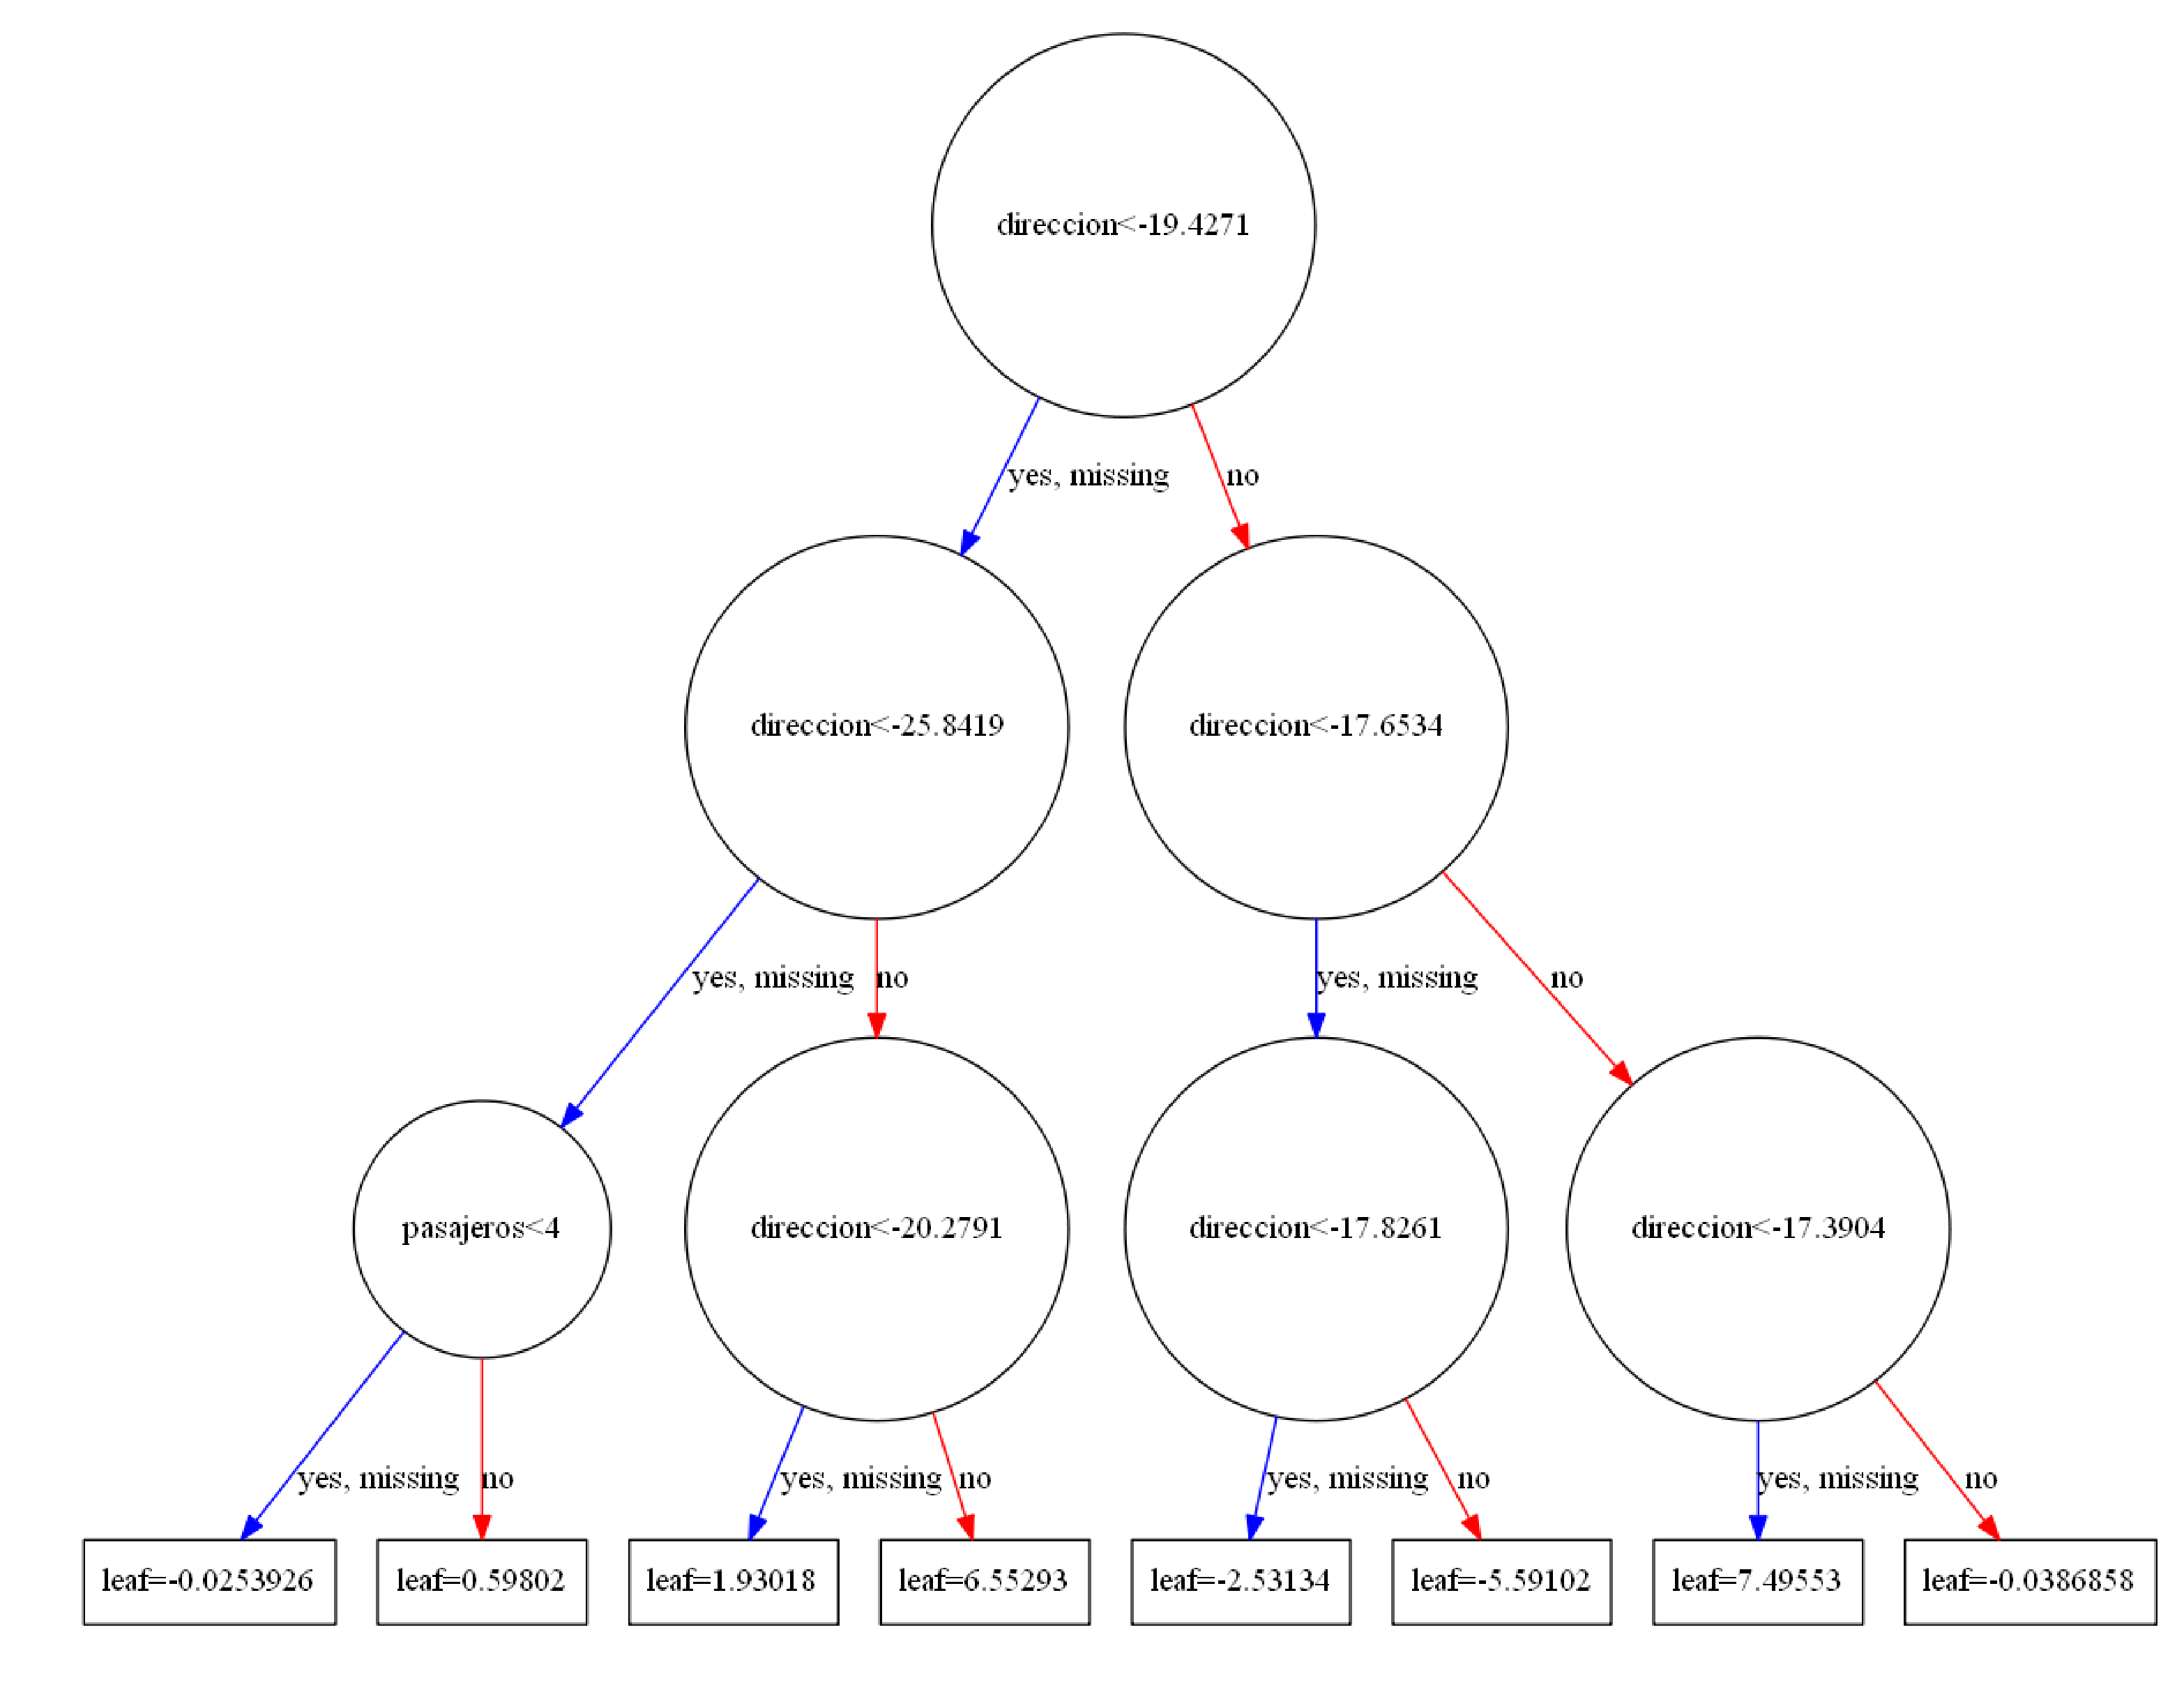

In [18]:
model = xgb.train(xgb_params,dtrain,num_boost_round=len(cv))
fig= plt.figure( figsize=(12, 12), dpi=250)
axes = plt.Axes(fig,[0., 0., 1., 1.])
axes.set_axis_off()
fig.add_axes(axes)
xgb.plot_tree(model,num_trees = len(cv) - 1,ax = axes)

### Tambien podemos visualizar la importancia de las variables. Es decir, que tan frecuentemente aparecieron como decisiones a tomar en un arbol?

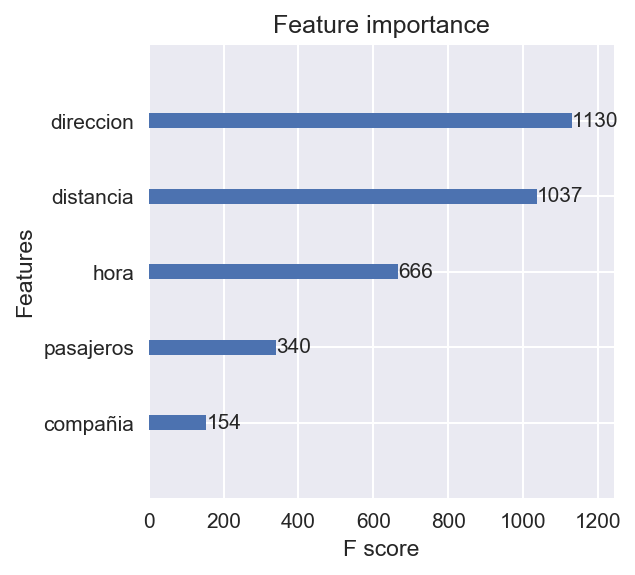

In [58]:
xgb.plot_importance(booster=model)

## Aprendizaje no Supervizado

### Hasta ahora, hemos creado modelos cuyo objetivo era modelar una relación entre los datos, dado un resultado u objetivo final. Es decir, buscabamos un modelo que pudiera generalizar bien para dar una respuesta para cualquier dato nuevo. Osea, al entrenar, le dabamos la respuesta correcta al modelo, y el modelo generalizaba según esas respuestas. Pero, qué pasa en el caso en que no tenemos las respuestas, pero aun así queremos saber como se relacionan los datos?

### Cuando este es nuestro objetivo, tenemos un problema de aprendizaje no supervisado. En este caso, veremos segmentación y reducción de dimensionalidad.

## Segmentación o Clustering

### Es la tarea de agrupar un grupo de datos de tal manera que los datos en el mismo segmento sean más parecidos a los datos de otros segmentos.

![title](http://www.exegetic.biz/static/img/2015/09/xclara-clusters-colour.png)

### Existen varios algoritmos para crear estos segmentos, pero en este caso veremos el algoritmo de *K-Means clustering.*

## K-Means 

#### El algoritmo de K-means toma un set de datos de N ejemplos, los cuales serán divididos en K centros, los cuales serán la base de cada cluster. Todos los ejemplos son clasificados según sus datos y asignados al centro más cercano. El algoritmo luego da como resultado K segmentos, donde cada dato dentro del segmento está más cerca de su centro que cualquier otro centro.

![title](https://www.mathworks.com/matlabcentral/mlc-downloads/downloads/submissions/19344/versions/1/screenshot.jpg)

### La condición matematica para los  $K$ segmentos $C_k$ y los $K$ centros $\mu_k$ se expresa como:

### Minimizar:
![title](https://s0.wp.com/latex.php?latex=%5Cdisplaystyle+%5Csum_%7Bk%3D1%7D%5EK+%5Csum_%7B%5Cmathrm%7Bx%7D_n+%5Cin+C_k%7D+%7C%7C%5Cmathrm%7Bx%7D_n+-+%5Cmu_k+%7C%7C%5E2&bg=ffffff&fg=000000&s=1)

### Con respecto a $C_k$ y  $\mu_k$. Esto significa que la distancia de cada punto hacia el centro de su segmento es minima. Para optimizar esto utilizamos el algoritmo de *Lloyd*.

### Algoritmo de Lloyd

1- Desde que un set de centros $\mu_k$ este disponible, actualizar los segmentos para contener los puntos más cercanos en distancia a cada centro. 

![title](https://s0.wp.com/latex.php?latex=%5Cdisplaystyle+C_k+%3D+%5C%7B%5Cmathrm%7Bx%7D_n+%3A+%7C%7C%5Cmathrm%7Bx%7D_n+-+%5Cmu_k%7C%7C+%5Cleq+%5Cmathrm%7B%5C%2C%5C%2Call%5C%2C%5C%2C%7D+%7C%7C%5Cmathrm%7Bx%7D_n+-+%5Cmu_l%7C%7C%5C%7D%5Cqquad%281%29&bg=ffffff&fg=000000&s=1)

2- Dado un set de segmentos, los centros son recalculados como la media de todos los puntos por segmento.

![title](https://s0.wp.com/latex.php?latex=%5Cdisplaystyle+%5Cmu_k+%3D+%5Cfrac%7B1%7D%7BC_k%7D%5Csum_%7B%5Cmathrm%7Bx%7D_n+%5Cin+C_k%7D%5Cmathrm%7Bx%7D_n%5Cqquad%282%29&bg=ffffff&fg=000000&s=1)

#### Repetimos estos pasos hasta que los centros ya no se actualicen.

#### De manera animada: 

![title](http://www.turingfinance.com/wp-content/uploads/2015/02/K-Means-Clustering-Gif.gif)

## Aplicación 3: Implementar K-Means en stats de Pokémon

### Después de volverte loco jugando Pokemon Go el año pasado, y aprender como analizar datos desde ese entonces, decides utilizar tus conocimientos en un dataset de estadisticas de Pokémon. Harás un análisis de segmentos con el algoritmo de K-Means.

<a id="pokemon"></a>

![title](https://www.serebii.net/xy/alakastat.jpg)

#### Esta función le asigna los datos a cada segmento.

In [20]:
def cluster_data(data, center):
    clusters = {}
    for point in data:
        #Encuentra el centro que tenga la distancia menor al punto.
        bestcenter = min([(i[0],np.linalg.norm(point - center[i[0]])) for i in enumerate(center)],
                         key = lambda t:t[1])[0]
        try:
            clusters[bestcenter].append(point)
        except:
            clusters[bestcenter] = [point]
    return clusters

#### Esta función re-crea los centros basados en la media del segmento.

In [21]:
def recreate_centers(center,clusters):
    new_center = []
    keys = sorted(clusters.keys())
    for key in keys:
        #Row based mean.
        new_center.append(np.mean(clusters[key], axis = 0))
    return new_center

In [22]:
def Converged(new_center,center):
    #Comprobar que los centros son iguales.
    new_points = set([tuple(point) for point in new_center])
    old_points = set([tuple(point) for point in center])
    return new_points == old_points

#### Juntamos todo en una sola función.

In [23]:
import random
def K_Means(data,K):
    random.seed(0)
    oldcenter = random.sample(data, K)
    newcenter = random.sample(data, K)
    clusters = None
    while not Converged(newcenter,oldcenter):
        oldcenter = newcenter
        clusters = cluster_data(data,newcenter)
        center = recreate_centers(oldcenter,clusters)
    return (newcenter,clusters)

In [39]:
pokemon = pd.read_csv("Pokemon.csv", index_col = "#")
stats = pokemon[pokemon.columns[4:10]]
pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [25]:
stats.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,
1,45,49,49,65,65,45
2,60,62,63,80,80,60
3,80,82,83,100,100,80
3,80,100,123,122,120,80
4,39,52,43,60,50,65


In [36]:
KCluster = K_Means(list(stats.values),3)
print("Centros {}".format(KCluster[0]))
print("Puntos por centro: {}".format([len(cluster) for cluster in KCluster[1].values()]))

Centros [array([95, 70, 73, 95, 90, 60], dtype=int64), array([50, 64, 50, 45, 50, 41], dtype=int64), array([ 75,  95, 125,  45,  75,  95], dtype=int64)]
Puntos por centro: [315, 347, 138]


#### Como podemos visualizar los segmentos en un plano si tienen 5 dimensiones?

### Reducción de Dimensionalidad

#### En Machine Learning, la reducción de dimensionalidad es la tarea de llevar datos de multiples dimensiones a un número menor de dimensiones. 

![title](https://www.analyticsvidhya.com/wp-content/uploads/2015/07/Image-4.png)

#### Se busca que aún reduciendo las dimensiones, se pierda el menor volumen de información en la transición.

### PCA: Principal Component Analysis

#### Este metodo elabora un mapeo lineal de los datos, de tal manera que la varianza en los datos después de transformarlos sea máxima. 
#### PCA de 3D a 2D:

![title](https://www.analyticsvidhya.com/wp-content/uploads/2016/03/1-1.png)

#### PCA de 2D a 1D: 

![title](https://alliance.seas.upenn.edu/~cis520/dynamic/2017/wiki/uploads/Lectures/pca-example-1D-of-2D_small.png)

#### Vamos a utilizar esta tecnica para poder llevar los segmentos de Pokémon a 2 dimensiones, y luego visualizarlas.

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

stats[stats.columns] = StandardScaler().fit_transform(stats)

C:\Users\juan9\Anaconda3Fix\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\juan9\Anaconda3Fix\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [44]:
stats_PCA = PCA(n_components=2).fit_transform(stats)
stats_PCA.shape

(800, 2)

### Ahora recreamos los segmentos, pero ahora utilizando la libreria sklearn por su transición facil a graficas.

In [47]:
from sklearn.cluster import KMeans
num_clusters = 3
kmeans_pca = KMeans(num_clusters).fit(stats_PCA)

### Ahora procedemos a graficar los resultados.

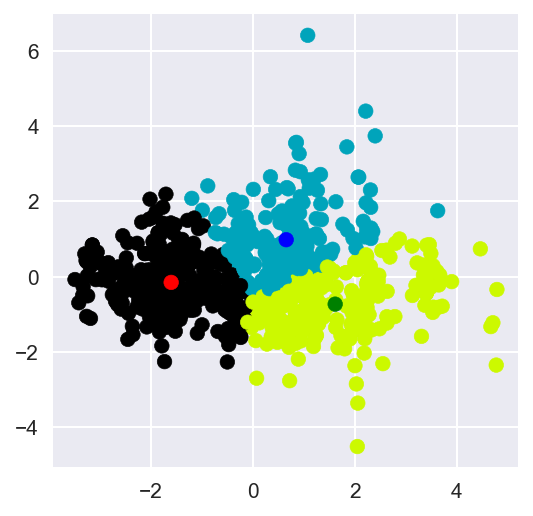

In [50]:
cmap = plt.get_cmap('nipy_spectral')
plt.scatter(stats_PCA[:,0], stats_PCA[:, 1], color = cmap(kmeans_pca.labels_/ num_clusters))
plt.scatter(kmeans_pca.cluster_centers_[:,0],kmeans_pca.cluster_centers_[:,1],color = ['r','b','g'])
plt.show()

### Para poder visualizar que representan los segmentos entre los datos reales, podemos agrupar los datos según su centro de segmento.

In [51]:
stats['pca'] = kmeans_pca.labels_
df_stats_mean = stats.groupby('pca').mean()
df_stats_mean.head()

C:\Users\juan9\Anaconda3Fix\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
pca,,,,,,
0,-0.673846,-0.689755,-0.689807,-0.650436,-0.745638,-0.463279
1,0.392339,0.245920,0.849439,-0.014793,0.523381,-0.429812
2,0.565316,0.728457,0.147833,0.924297,0.539678,1.061760


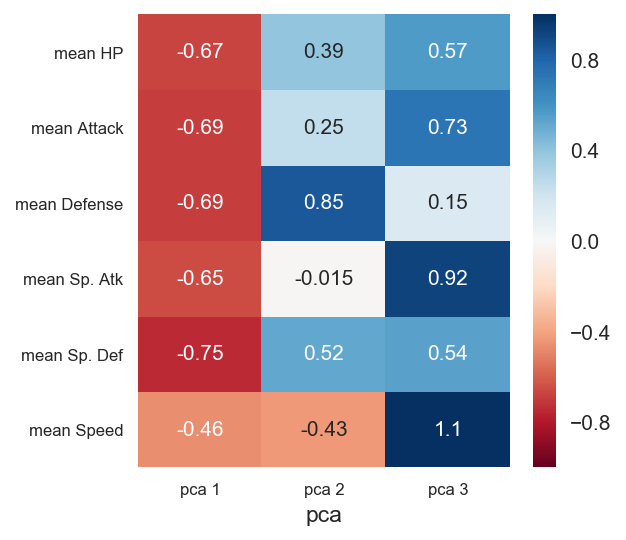

In [57]:
ax = sns.heatmap(df_stats_mean[df_stats_mean.columns].transpose(), 
                 center=0, cmap="RdBu", vmin=-1, vmax=1, annot=True)
ax.set_xticklabels(['pca ' + str(i + 1) for i in range(num_clusters) ], rotation=0, fontsize=8);
ax.set_yticklabels(['mean ' + c for c in df_stats_mean.columns][::-1], rotation=0, fontsize=8);
plt.show()

### Con esta información, podemos crear nuestra propia variable de clasificación para los datos.

## Gracias a todos! Espero les haya servido de mucho aprender sobre Machine Learning y como poder aplicarlo a datos  de varios ambitos. 